## Import Packages

In [1]:
import pandas as pd

In [2]:
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn import metrics

In [4]:
from sklearn.metrics import accuracy_score as accuracy

In [5]:
%matplotlib inline

## Import Data

In [6]:
data = pd.read_csv("credit-data.csv")

## Convert datatypes

In [7]:
data.dtypes

PersonID                                  int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
zipcode                                   int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [8]:
data.PersonID = data.PersonID.astype("str")

In [9]:
data.SeriousDlqin2yrs = data.SeriousDlqin2yrs.astype("category")

In [10]:
data.zipcode = data.zipcode.astype("str")

In [11]:
data.dtypes

PersonID                                  object
SeriousDlqin2yrs                        category
RevolvingUtilizationOfUnsecuredLines     float64
age                                        int64
zipcode                                   object
NumberOfTime30-59DaysPastDueNotWorse       int64
DebtRatio                                float64
MonthlyIncome                            float64
NumberOfOpenCreditLinesAndLoans            int64
NumberOfTimes90DaysLate                    int64
NumberRealEstateLoansOrLines               int64
NumberOfTime60-89DaysPastDueNotWorse       int64
NumberOfDependents                       float64
dtype: object

## Find Distributions of Different Variables

In [12]:
data.SeriousDlqin2yrs.describe()

count     41016
unique        2
top           0
freq      34396
Name: SeriousDlqin2yrs, dtype: int64

In [13]:
data.SeriousDlqin2yrs.isnull().values.any()

False

In [14]:
data.RevolvingUtilizationOfUnsecuredLines.describe()

count    41016.00000
mean         6.37587
std        221.61895
min          0.00000
25%          0.03431
50%          0.18973
75%          0.66716
max      22000.00000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

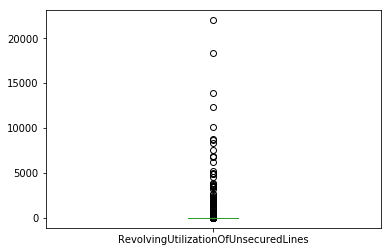

In [15]:
data.RevolvingUtilizationOfUnsecuredLines.plot.box()

In [16]:
data.age.describe()

count    41016.000000
mean        51.683489
std         14.746880
min         21.000000
25%         41.000000
50%         51.000000
75%         62.000000
max        109.000000
Name: age, dtype: float64

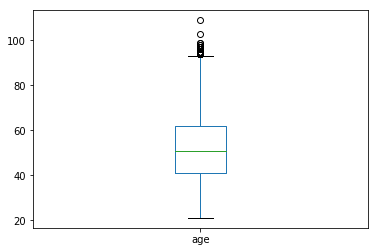

In [17]:
data.age.plot.box()

In [18]:
data['NumberOfTime30-59DaysPastDueNotWorse'].describe()

count    41016.000000
mean         0.589233
std          5.205628
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         98.000000
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: float64

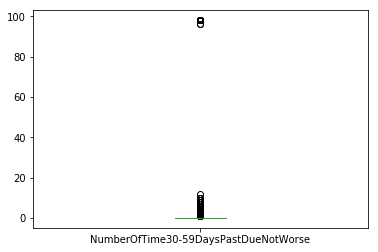

In [19]:
data['NumberOfTime30-59DaysPastDueNotWorse'].plot.box()

In [20]:
data.DebtRatio.describe()

count     41016.000000
mean        331.458137
std        1296.109695
min           0.000000
25%           0.176375
50%           0.369736
75%           0.866471
max      106885.000000
Name: DebtRatio, dtype: float64

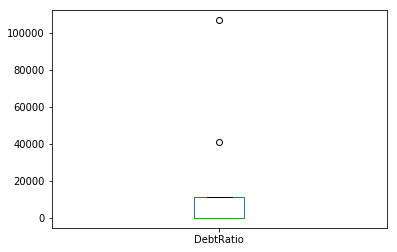

In [21]:
data.DebtRatio.describe().plot.box()

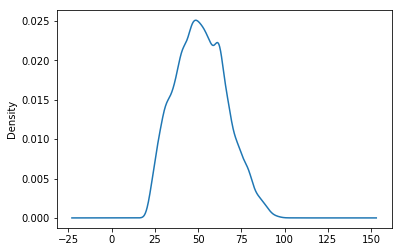

In [22]:
data['age'].plot.density()

## Find Summaries of Variables

In [23]:
columns_interested = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']

In [24]:
data[columns_interested].describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,41016.00000,41016.000000,41016.000000,41016.000000,3.304200e+04,41016.000000,41016.000000,41016.000000,41016.000000,39979.000000
mean,6.37587,51.683489,0.589233,331.458137,6.578996e+03,8.403477,0.419592,1.008801,0.371587,0.773231
std,221.61895,14.746880,5.205628,1296.109695,1.344683e+04,5.207324,5.190382,1.153826,5.169641,1.121269
min,0.00000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.03431,41.000000,0.000000,0.176375,3.333000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.18973,51.000000,0.000000,0.369736,5.250000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.66716,62.000000,0.000000,0.866471,8.055750e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,22000.00000,109.000000,98.000000,106885.000000,1.794060e+06,56.000000,98.000000,32.000000,98.000000,13.000000


## Find Correlations between Variables

In [25]:
data['MonthlyIncome'].corr(data['age'])

0.048137653151124414

In [26]:
data['RevolvingUtilizationOfUnsecuredLines'].corr(data['MonthlyIncome'])

0.00583183680299953

In [27]:
data['NumberOfTime30-59DaysPastDueNotWorse'].corr(data['MonthlyIncome'])

-0.015223778779714788

In [28]:
data['NumberOfTime60-89DaysPastDueNotWorse'].corr(data['MonthlyIncome'])

-0.015336268366356234

In [29]:
data['NumberOfTime30-59DaysPastDueNotWorse'].corr(data['NumberOfTime60-89DaysPastDueNotWorse'])

0.9885297253844909

## Fill in NA values with Mean

In [30]:
data[columns_interested] = data[columns_interested].fillna(data[columns_interested].mean())

In [31]:
data.isnull().values.any()

False

## Write the Function to discretize Continuous Variables

In [32]:
def discretize_col(data, column):
    '''
    To discretize the continuous variable into three discrete variables: 0, 1, and 2;
    the boundaries are the minimum value, the 25% quantile, the 75% quantile, and the maximum value.
    
    Inputs: data, pandas dataframe
            column, string
    '''
    
    data[column] = pd.cut(data[column], bins=[data[column].min(), data[column].quantile(0.25), data[column].quantile(0.75),
                                              data[column].max()], labels=[0,1,2], include_lowest=True)

In [33]:
discretize_col(data, 'age')

In [34]:
discretize_col(data, 'MonthlyIncome')

In [35]:
discretize_col(data, 'RevolvingUtilizationOfUnsecuredLines')

## Write the Function to create Binary Variable on Label

In [36]:
def to_binary(item):
    '''
    Convert the label to binary variables 'No' or 'Yes'
    
    Input: item, integer
    Output: value, string
    '''
    
    if item == 0:
        value = 'No'
    elif item == 1:
        value = 'Yes'
    return value

## Build the Decision Tree Classifier Model

In [37]:
features = ['RevolvingUtilizationOfUnsecuredLines','age', 'MonthlyIncome']
label = ['SeriousDlqin2yrs']

In [38]:
data[label[0]] = data[label[0]].apply(lambda x: to_binary(x))

In [40]:
train_x = data[features]

In [41]:
train_y = data[label]

In [42]:
tree = DecisionTreeClassifier()

In [43]:
tree.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Evaluate Classifier

In [44]:
y_pred = tree.predict(train_x)

In [45]:
metrics.accuracy_score(train_y, y_pred)

0.8385995708991613